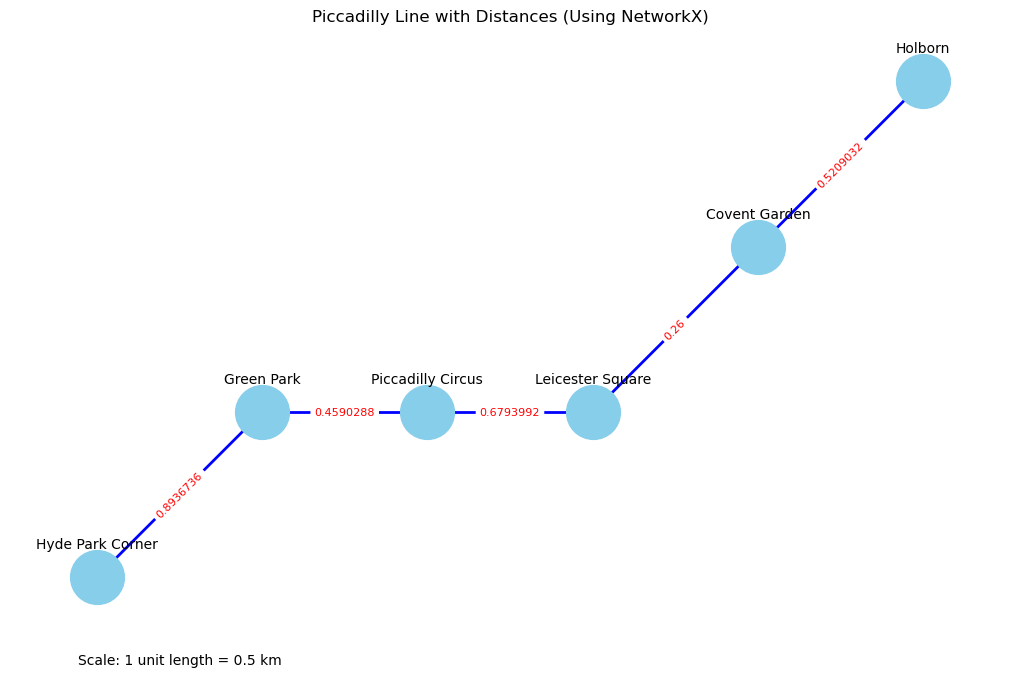

In [1]:


import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

#task one

# Define stations and distances
stations = ['Hyde Park Corner', 'Green Park', 'Piccadilly Circus', 'Leicester Square', 'Covent Garden', 'Holborn']
actual_distances = [0.8936736, 0.4590288, 0.6793992, 0.26, 0.5209032]  # Distances between stations in kilometers

# Create a graph using NetworkX
G = nx.Graph()

# Add stations as nodes to the graph
for station in stations:
    G.add_node(station)

# Add edges between stations based on their order in the list
for i in range(len(stations) - 1):
    G.add_edge(stations[i], stations[i + 1], weight=actual_distances[i])

# Plot the graph
plt.figure(figsize=(10, 6))

# Manually define positions for each node
pos = {
    'Hyde Park Corner': (0, 0),
    'Green Park': (1, 1),
    'Piccadilly Circus': (2, 1),
    'Leicester Square': (3, 1),
    'Covent Garden': (4, 2),
    'Holborn': (5, 3)
}

# Draw the graph with nodes and edges
nx.draw(G, pos, node_size=1500, node_color='skyblue', font_size=10, font_weight='bold', edge_color='blue', width=2)

# Add edge labels showing the actual distances
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

# Calculate offset positions for node labels to avoid blocking edges
label_pos = {node: (x, y + 0.2) for node, (x, y) in pos.items()}  # Adjust the offset (0.2) as needed

# Draw node labels with calculated offset positions
nx.draw_networkx_labels(G, label_pos, labels={node: node for node in G.nodes()}, font_size=10, font_color='black')

# Add a legend for the scale of distances
plt.text(0.5, -0.5, 'Scale: 1 unit length = 0.5 km', horizontalalignment='center', verticalalignment='center', fontsize=10)

# Set title
plt.title('Piccadilly Line with Distances (Using NetworkX)')


# Save the image on your desktop
plt.savefig(r'C:\Users\user\Desktop\piccadilly_line.png')


# Show the plot (optional)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\user\AppData\Local\Temp\ipykernel_10740\2210778015.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


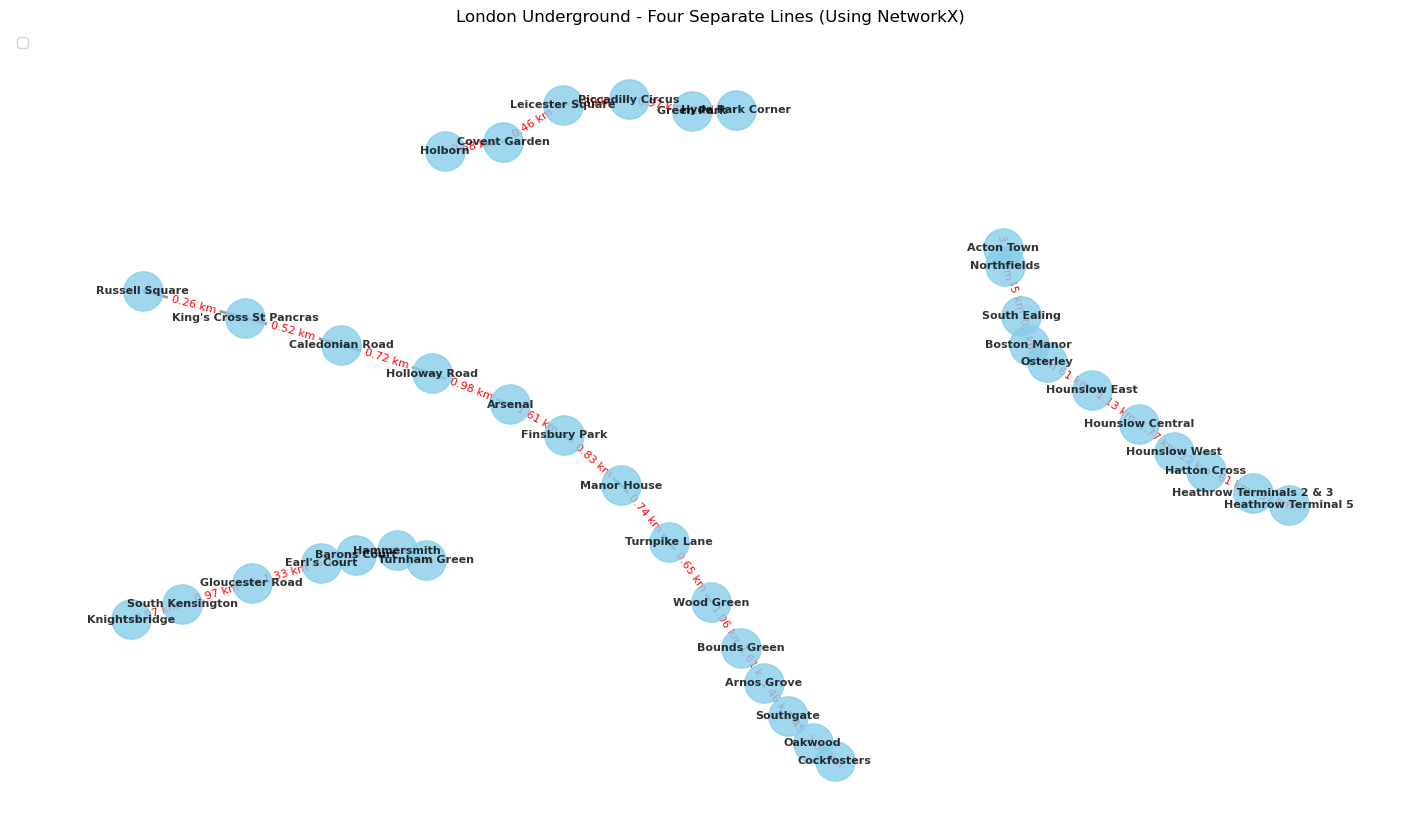

In [5]:
#TASK 2
import matplotlib.pyplot as plt
import networkx as nx

# Define stations for each line
line_one_stations = ['Heathrow Terminal 5', 'Heathrow Terminals 2 & 3', 'Hatton Cross', 'Hounslow West',
                     'Hounslow Central', 'Hounslow East', 'Osterley', 'Boston Manor', 'South Ealing',
                     'Northfields', 'Acton Town']

line_two_stations = ['Turnham Green', 'Hammersmith', 'Barons Court', 'Earl\'s Court',
                     'Gloucester Road', 'South Kensington', 'Knightsbridge']

line_three_stations = ['Hyde Park Corner', 'Green Park', 'Piccadilly Circus', 'Leicester Square',
                       'Covent Garden', 'Holborn']

line_four_stations = ['Russell Square', 'King\'s Cross St Pancras', 'Caledonian Road', 'Holloway Road',
                      'Arsenal', 'Finsbury Park', 'Manor House', 'Turnpike Lane', 'Wood Green', 'Bounds Green',
                      'Arnos Grove', 'Southgate', 'Oakwood', 'Cockfosters']

# Distances between stations in km
distances = [2.57495, 1.60934, 3.21869, 1.77028, 1.12654, 1.60934, 6.0, 2.09215, 0.4514088, 3.37962, 2.73588,
             3.70149, 6.11551, 1.330147, 0.965606, 0.965606, 1.60934, 0.965606, 0.8936736, 0.4590288,
             0.6793992, 0.26, 0.5209032, 0.7226808, 0.984504, 1.60934, 0.8327136, 0.7440168, 0.6470904,
             1.061923, 1.60934, 1.460297, 1.451762, 2.09215, 1.60934, 1.60934, 1.24145]

# Create a graph using NetworkX
G = nx.Graph()

# Add stations as nodes to the graph
for station in line_one_stations + line_two_stations + line_three_stations + line_four_stations:
    G.add_node(station)

# Add edges between stations within each line with distances
def add_line_edges(line_stations, line_distances):
    for i in range(len(line_stations) - 1):
        G.add_edge(line_stations[i], line_stations[i + 1], weight=line_distances[i])

add_line_edges(line_one_stations, distances[:len(line_one_stations)-1])
add_line_edges(line_two_stations, distances[len(line_one_stations)-1:len(line_one_stations) + len(line_two_stations)-2])
add_line_edges(line_three_stations, distances[len(line_one_stations) + len(line_two_stations)-2:len(line_one_stations) + len(line_two_stations) + len(line_three_stations)-3])
add_line_edges(line_four_stations, distances[len(line_one_stations) + len(line_two_stations) + len(line_three_stations)-3:])

# Create a spring layout for the graph
pos = nx.spring_layout(G)

# Plot the graph with adjusted node positions
plt.figure(figsize=(14, 8))
nx.draw(G, pos, with_labels=True, node_size=800, node_color='skyblue', font_size=8, font_weight='bold',
        edge_color='gray', width=2, alpha=0.8)

# Add edge labels showing distances
edge_labels = {(u, v): f'{d:.2f} km' for u, v, d in G.edges(data='weight')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

# Set title and legend
plt.title('London Underground - Four Separate Lines (Using NetworkX)')
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.axis('off')

# Save the image on your desktop
plt.savefig(r'C:\Users\user\Desktop\four_lin.png')
plt.show()


In [6]:
#Task 3

import networkx as nx
import numpy as np

# Define stations for each line (same as in your previous code)
line_one_stations = ['Heathrow Terminal 5', 'Heathrow Terminals 2 & 3', 'Hatton Cross', 'Hounslow West',
                     'Hounslow Central', 'Hounslow East', 'Osterley', 'Boston Manor', 'South Ealing',
                     'Northfields', 'Acton Town']

line_two_stations = ['Turnham Green', 'Hammersmith', 'Barons Court', 'Earl\'s Court',
                     'Gloucester Road', 'South Kensington', 'Knightsbridge']

line_three_stations = ['Hyde Park Corner', 'Green Park', 'Piccadilly Circus', 'Leicester Square',
                       'Covent Garden', 'Holborn']

line_four_stations = ['Russell Square', 'King\'s Cross St Pancras', 'Caledonian Road', 'Holloway Road',
                      'Arsenal', 'Finsbury Park', 'Manor House', 'Turnpike Lane', 'Wood Green', 'Bounds Green',
                      'Arnos Grove', 'Southgate', 'Oakwood', 'Cockfosters']

# Distances between stations in km (same as in your previous code)
distances = [2.57495, 1.60934, 3.21869, 1.77028, 1.12654, 1.60934, 6.0, 2.09215, 0.4514088, 3.37962, 2.73588,
             3.70149, 6.11551, 1.330147, 0.965606, 0.965606, 1.60934, 0.965606, 0.8936736, 0.4590288,
             0.6793992, 0.26, 0.5209032, 0.7226808, 0.984504, 1.60934, 0.8327136, 0.7440168, 0.6470904,
             1.061923, 1.60934, 1.460297, 1.451762, 2.09215, 1.60934, 1.60934, 1.24145]

# Create a graph using NetworkX (same as in your previous code)
G = nx.Graph()

# Add stations as nodes to the graph (same as in your previous code)
for station in line_one_stations + line_two_stations + line_three_stations + line_four_stations:
    G.add_node(station)

# Add edges between stations within each line with distances (same as in your previous code)
def add_line_edges(line_stations, line_distances):
    for i in range(len(line_stations) - 1):
        G.add_edge(line_stations[i], line_stations[i + 1], weight=line_distances[i])

add_line_edges(line_one_stations, distances[:len(line_one_stations)-1])
add_line_edges(line_two_stations, distances[len(line_one_stations)-1:len(line_one_stations) + len(line_two_stations)-2])
add_line_edges(line_three_stations, distances[len(line_one_stations) + len(line_two_stations)-2:len(line_one_stations) + len(line_two_stations) + len(line_three_stations)-3])
add_line_edges(line_four_stations, distances[len(line_one_stations) + len(line_two_stations) + len(line_three_stations)-3:])

# Calculate the total length of the transport network
total_length = sum(distances)
print("Total Length of the Transport Network:", total_length, "km")

# Calculate the average distance between stations using numpy
average_distance = np.mean(distances)
print("Average Distance Between Stations:", average_distance, "km")

# Calculate the standard deviation of the distances between stations using numpy
std_deviation = np.std(distances)
print("Standard Deviation of Distances Between Stations:", std_deviation, "km")


Total Length of the Transport Network: 62.71045620000001 km
Average Distance Between Stations: 1.6948771945945948 km
Standard Deviation of Distances Between Stations: 1.321797182741193 km
